\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}

\begin{align*}x_j^{(i)} &= \text{value of feature } j \text{ in the }i^{th}\text{ training example} \newline x^{(i)}& = \text{the input (features) of the }i^{th}\text{ training example} \newline m &= \text{the number of training examples} \newline n &= \text{the number of features} \end{align*}

\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}

Remark: Note that for convenience reasons in this course we assume x(i)0=1 for (i∈1,…,m). This allows us to do matrix operations with theta and x. Hence making the two vectors 'θ' and x(i) match each other element-wise (that is, have the same number of elements: n+1).]

\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}

\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \text{for j := 0...n}\newline \rbrace\end{align*}

Gradient Descent in Practice I - Feature Scaling

Note: [6:20 - The average size of a house is 1000 but 100 is accidentally written instead]

We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

−1 ≤ x(i) ≤ 1

or

−0.5 ≤ x(i) ≤ 0.5

These aren't exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are feature scaling and mean normalization. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:

xi:=xi−μisi
Where μi is the average of all the values for feature (i) and si is the range of values (max - min), or si is the standard deviation.

Note that dividing by the range, or dividing by the standard deviation, give different results. The quizzes in this course use range - the programming exercises use standard deviation.

For example, if xi represents housing prices with a range of 100 to 2000 and a mean value of 1000, then, xi:=price−10001900.

feature scaling = limit each x(i) to a range to accelerate gradient descent. 

Mean normalization: xi = (xi - mean)/(max-min) # similar to Z score but here we use range instead of std as denominator.

Normal Equation

\begin{align*}\theta = (X^T X)^{-1}X^T y \end{align*}

下面的h(x)是要拟合的函数，J(theta)损失函数，theta是参数，要迭代求解的值，theta求解出来了那最终要拟合的函数h(theta)就出来了。其中m是训练集的记录条数，j是参数的个数。

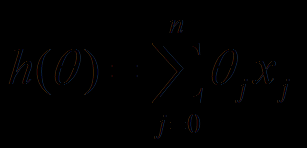
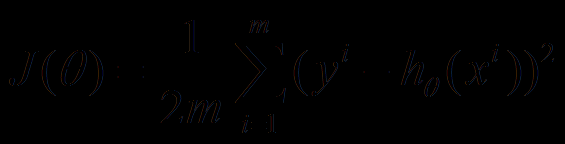

1、批量梯度下降的求解思路如下：

（1）将J(theta)对theta求偏导，得到每个theta对应的的梯度
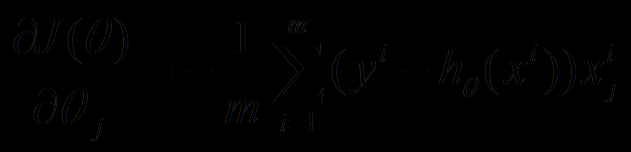
（2）由于是要最小化风险函数，所以按每个参数theta的梯度负方向，来更新每个theta
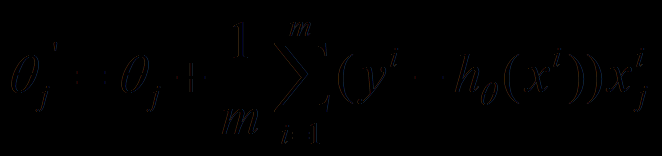
（3）从上面公式可以注意到，它得到的是一个全局最优解，但是每迭代一步，都要用到训练集所有的数据，如果m很大，那么可想而知这种方法的迭代速度！！所以，这就引入了另外一种方法，随机梯度下降。

2、随机梯度下降的求解思路如下：

（1）上面的风险函数可以写成如下这种形式，损失函数对应的是训练集中每个样本的粒度，而上面批量梯度下降对应的是所有的训练样本：(costfunction())
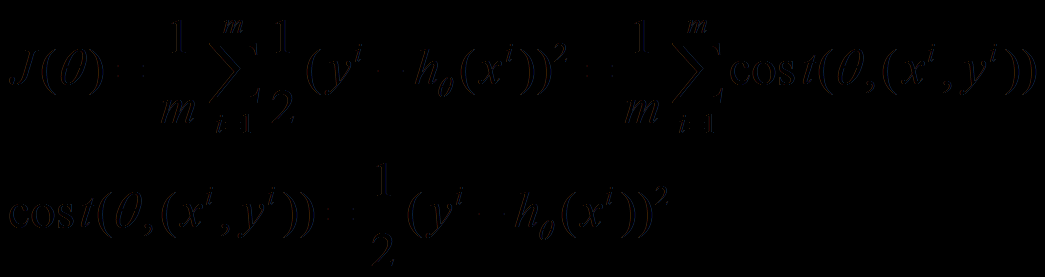
（2）每个样本的损失函数，对theta求偏导得到对应梯度，来更新theta
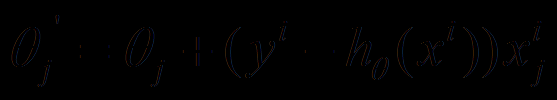
（3）随机梯度下降是通过每个样本来迭代更新一次，如果样本量很大的情况（例如几十万），那么可能只用其中几万条或者几千条的样本，就已经将theta迭代到最优解了，对比上面的批量梯度下降，迭代一次需要用到十几万训练样本，一次迭代不可能最优，如果迭代10次的话就需要遍历训练样本10次。但是，SGD伴随的一个问题是噪音较BGD要多，使得SGD并不是每次迭代都向着整体最优化方向。

局部加权线性回归

我们现实生活中的很多数据不一定都能用线性模型描述。依然是房价问题，很明显直线非但不能很好的拟合所有数据点，而且误差非常大，但是一条类似二次函数的曲线却能拟合地很好。为了解决非线性模型建立线性模型的问题，我们预测一个点的值时，选择与这个点相近的点而不是所有的点做线性回归。基于这个思想，便产生了局部加权线性回归算法。在这个算法中，其他离一个点越近，权重越大，对回归系数的贡献就越多。

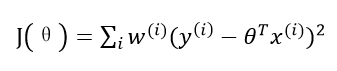

其中w(i)是权重，它根据要预测的点与数据集中的点的距离来为数据集中的点赋权值。当某点离要预测的点越远，其权重越小，否则越大。一个比较好的权重函数如下： 

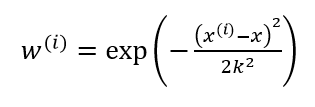

该函数称为指数衰减函数，其中k为波长参数，它控制了权值随距离下降的速率，该函数形式上类似高斯分布(正态分布)，但并没有任何高斯分布的意义。该算法解出回归系数如下： 

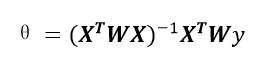

在使用这个算法训练数据的时候，不仅需要学习线性回归的参数，还需要学习波长参数。这个算法的问题在于，对于每一个要预测的点，都要重新依据整个数据集计算一个线性回归模型出来，使得算法代价极高。